Logistic Regression Accuracy: 89.01%
Decision Tree Accuracy: 89.92%
Random Forest Accuracy: 92.71%
KNN Accuracy: 88.36%
SVM Accuracy: 90.84%


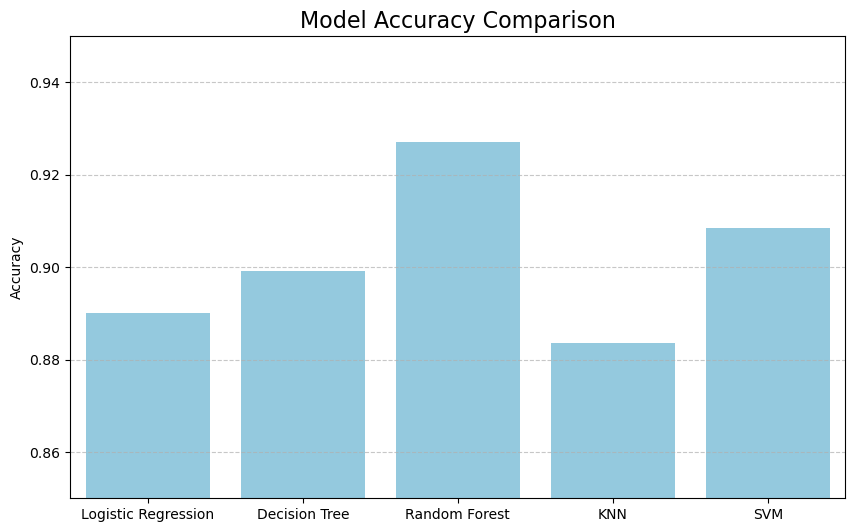


📊 SHAP Summary Plot for Random Forest (Top 10 Features):


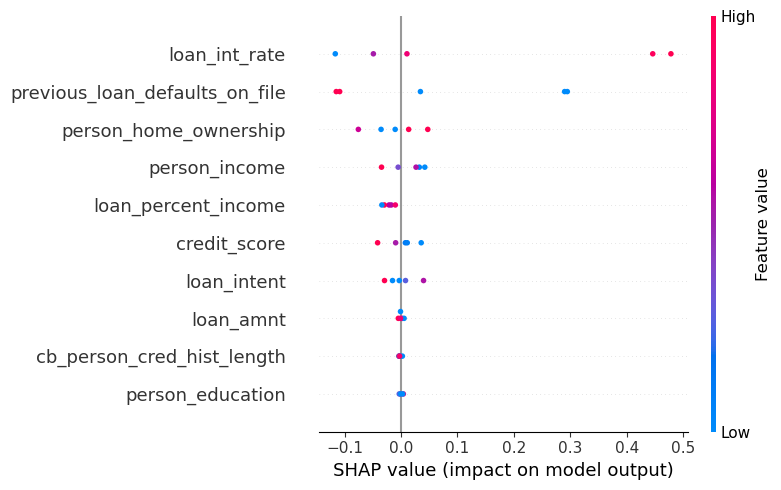


🔍 LIME Explanation for a Test Instance (Random Forest):

🎯 Prediction Summary
Predicted Class: ❌ Rejected
Confidence for Approved (1): 4.00%
Confidence for Rejected (0): 96.00%


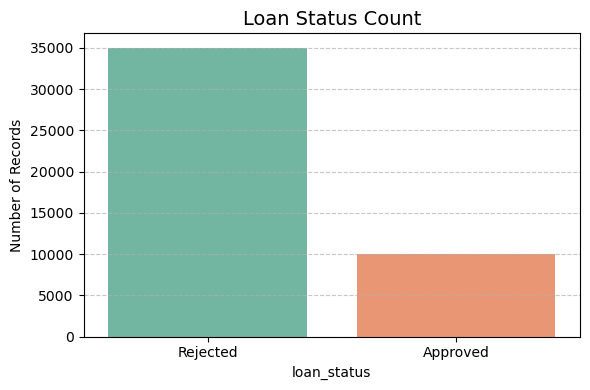

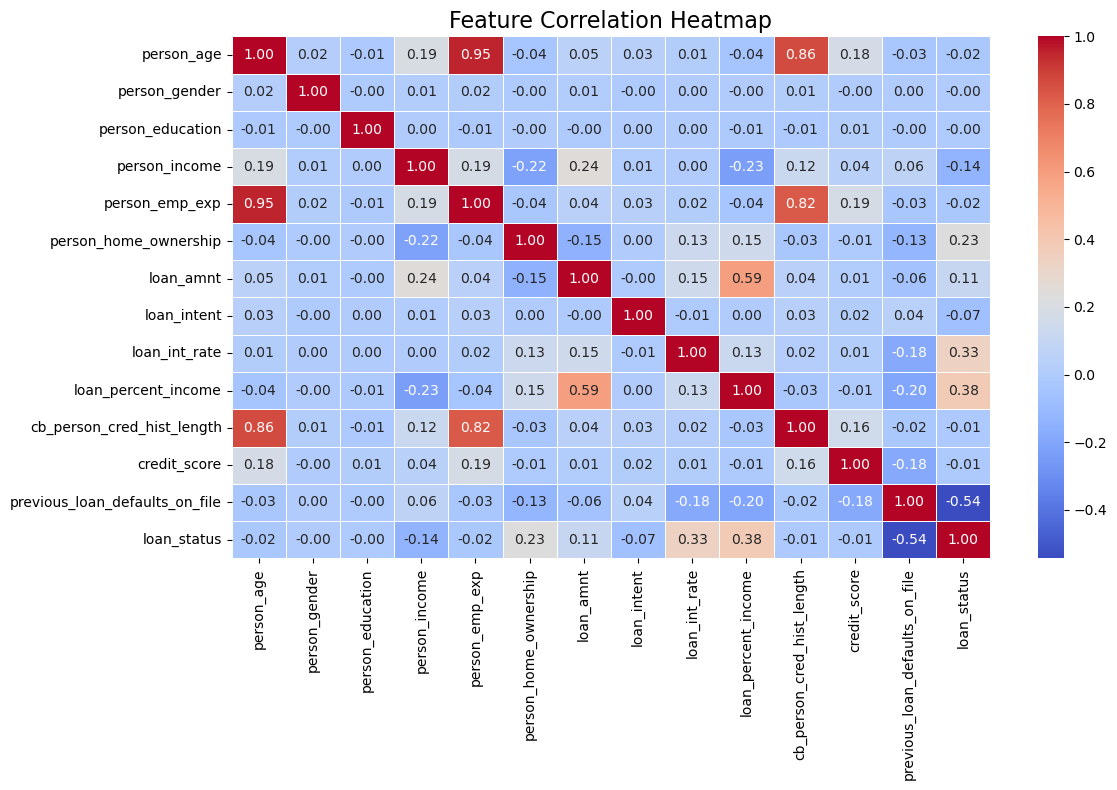

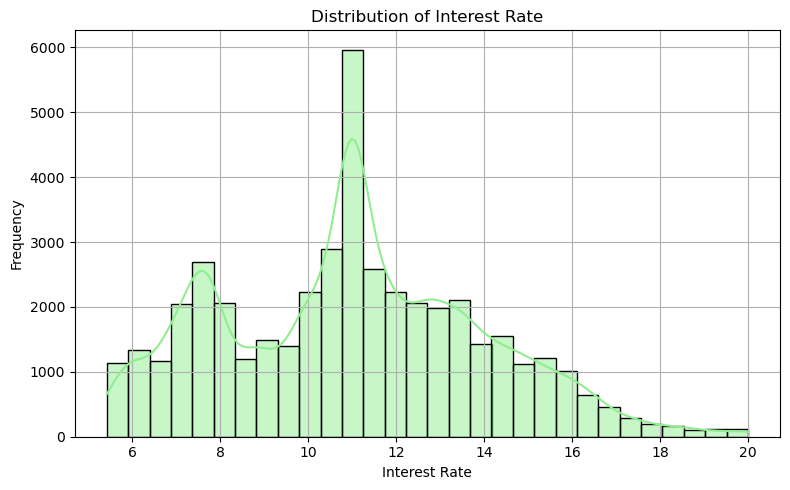

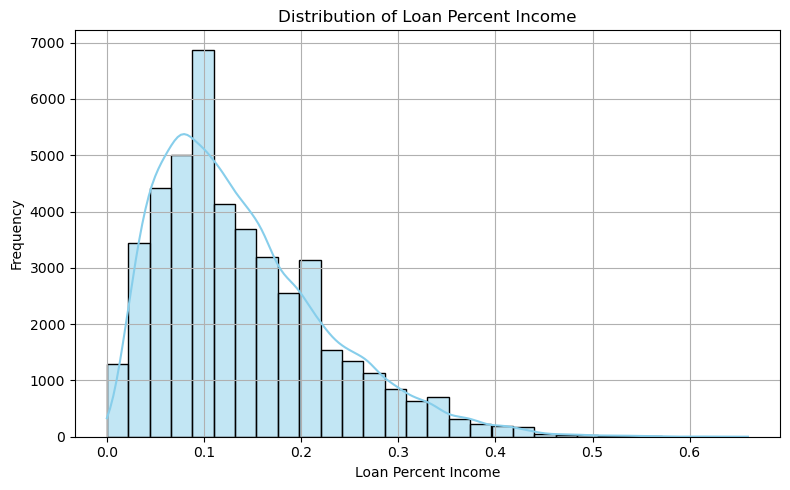

In [ ]:
# Install required libraries (uncomment if needed)
# !pip install shap lime seaborn matplotlib --quiet

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import shap
import lime
import lime.lime_tabular

# Load dataset
df = pd.read_csv('loan_data.csv')
df.ffill(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models (SVM included)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(probability=True)
}

# Train and evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc * 100:.2f}%")

# 📊 Accuracy Comparison Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), color="skyblue")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.ylim(0.85, 0.95)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ✅ SHAP Summary Plot (Random Forest)
print("\n📊 SHAP Summary Plot for Random Forest (Top 10 Features):")
explainer = shap.Explainer(models["Random Forest"].predict, X_train[:100])
shap_values = explainer(X_test[:5])

rng = np.random.default_rng(42)
shap.summary_plot(
    shap_values,
    X_test[:5],
    feature_names=df.drop('loan_status', axis=1).columns,
    max_display=10,
    plot_size=(8, 5),
    show=True,
    rng=rng
)

# ✅ LIME Explanation (Random Forest)
print("\n🔍 LIME Explanation for a Test Instance (Random Forest):")
instance_index = 0
instance = X_test[instance_index]

lime_exp = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=df.drop('loan_status', axis=1).columns,
    class_names=['Rejected', 'Approved'],
    mode='classification'
)

exp = lime_exp.explain_instance(instance, models["Random Forest"].predict_proba, num_features=8)

# Get both class probabilities
probas = models["Random Forest"].predict_proba([instance])[0]
pred_class = np.argmax(probas)

# Text Output
print("\n🎯 Prediction Summary")
print(f"Predicted Class: {'✔️ Approved' if pred_class == 1 else '❌ Rejected'}")
print(f"Confidence for Approved (1): \033[1;32m{probas[1] * 100:.2f}%\033[0m")
print(f"Confidence for Rejected (0): \033[1;31m{probas[0] * 100:.2f}%\033[0m")

# Show LIME explanation
exp.show_in_notebook(show_table=True, show_all=False)

# 1️⃣ Loan Status Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df, hue='loan_status', palette='Set2', legend=False)  # ✅ Fixed warning
plt.title("Loan Status Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'])
plt.ylabel("Number of Records")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2️⃣ Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()




# 3️⃣ Distribution of Interest Rate
if 'loan_int_rate' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['loan_int_rate'], bins=30, kde=True, color='lightgreen')
    plt.title("Distribution of Interest Rate")
    plt.xlabel("Interest Rate")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Column 'int_rate' not found in the dataset.")

#  Distribution of Loan Percent Income
if 'loan_percent_income' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['loan_percent_income'], bins=30, kde=True, color='skyblue')
    plt.title("Distribution of Loan Percent Income")
    plt.xlabel("Loan Percent Income")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Column 'loan_percent_income' not found in the dataset.")
